In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading the data

In [2]:
df=pd.read_csv("dataframe_.csv")
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


# Data preprocessing 

In [3]:
df.info

<bound method DataFrame.info of            input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]>

In [4]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [5]:
df.shape

(1697, 2)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

input     0
output    0
dtype: int64

# Splitting the data

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Detecting the outliers

In [9]:
z = np.abs(stats.zscore(df))
threshold = 3
data = df[(z < threshold).all(axis=1)]

# Splitting the data into train and test 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# performing the feature scaling 

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)
cv_scores_lr = -1 * cross_val_score(regressor_lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

In [13]:
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train, y_train)
cv_scores_dt = -1 * cross_val_score(regressor_dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

In [14]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)
cv_scores_rf = -1 * cross_val_score(regressor_rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')


# Selecting the best model based on mean cross-validation MSE

In [15]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
cv_scores = [np.mean(cv_scores_lr), np.mean(cv_scores_dt), np.mean(cv_scores_rf)]
best_model = models[np.argmin(cv_scores)]
print("Best Model:", best_model)

Best Model: Random Forest


In [16]:
if best_model == 'Linear Regression':
    regressor = regressor_lr
elif best_model == 'Decision Tree':
    regressor = regressor_dt
else:
    regressor = regressor_rf

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 1470.06696212718


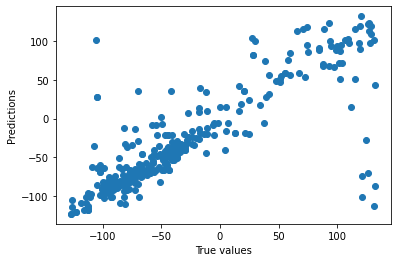

In [19]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [22]:
regressor.score(X_test,y_test)

0.6875294403496188